## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()['temperature']['std']
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Question 1 
Is the distribution of body temperature normal?

THE MEAN OF z-score IS: 0


,temperature,gender,heart_rate,z_scores
0,99.3,F,68.0,1.433161
1,98.4,F,81.0,0.205637
2,97.8,M,73.0,-0.612713
3,99.2,F,66.0,1.296769
4,98.0,F,73.0,-0.339930


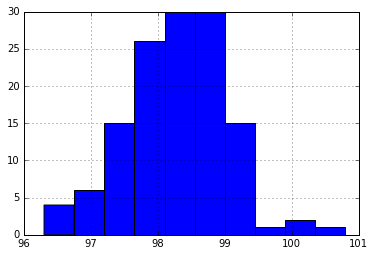

In [4]:

df.temperature.hist()
mean = df.describe()['temperature']['mean']
std = df.describe()['temperature']['std']
df['z_scores'] = [(df.temperature_i - mean)/std for df.temperature_i in df.temperature]

print("THE MEAN OF z-score IS:",round(df.z_scores.mean()))
condf.head()

# Conclusion
From the above figure and the z values - we see that the distribution is normal. 

# Question 2
Is the true population mean really 98.6 degrees F?
Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

    Null Hypothesis: The population mean of body temperature is 98.6 degree F
    Alternative hypothesis: The population mean of body temperature is not 98.6 degree F


In [11]:
sample_mean = df.temperature.mean()
sample_std  = df.temperature.std()
print( sample_mean, sample_std)

98.24923076923078 0.7331831580389454


In [15]:
std= sample_std/(130**0.5)
print ("Sample Standard deviation ", std)
# # of standard deviations the proposed mean is away from sample mean (Z score):
z_score=(sample_mean-98.6)/std
print ( 'Zscore ' , z_score)
p_value=scipy.stats.norm.cdf(z_score)
print('p-value = ', p_value)


Sample Standard deviation  0.06430441683789101
Zscore  -5.454823292364079
p-value =  2.45107850706e-08


# Conclusion
We can reject H0 since the p value is very low and the hypothesized value is 5 standard deviations away from the mean.
We use Z score since sample size is greater than 30

# Question 3
At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [17]:
scipy.stats.norm.interval(0.99, loc=sample_mean, scale=std)

(98.083593567992111, 98.414867970469444)

# Conculsion 
If the temperature is lesser than 98.08 or greater than 98.414 - then we categorize them as abnormal.

# Question 4
Is there a significant difference between males and females in normal temperature?
- Set up and solve for a two sample hypothesis testing.

H0: There is no difference in temperature between males and females (mean_delta = 0)
H1: There is significant difference in temp between males and females (mean_delta > 0)

In [26]:
female_mean = df[df.gender=='F'].temperature.mean()
feamale_std = df[df.gender=='F'].temperature.std()
female_count  = df[df.gender=='F'].temperature.count()

male_mean   = df[df.gender=='M'].temperature.mean()
male_std    = df[df.gender=='M'].temperature.std()
male_count  = df[df.gender=='M'].temperature.count()

mean_delta = female_mean - male_mean
std_del = ((feamale_std**2/female_count) + (male_std**2/male_count))**0.5
z_score = mean_delta / std_del 
print (mean_delta,  std_del)
print('Z score = ', z_score)
p_value =  1- scipy.stats.norm.cdf(z_score)
print('p_value = ', p_value)

0.289230769230727 0.12655395042
Z score =  2.28543453817
p_value =  0.0111436803803


# Conclusion 
Since the pvalue score is less than .05 - with 95% confidence, we can reject the null hypothesis, There is a differnece between male and female temperatures